# querying the data lake in a jupyter notebook

## prerequisites

make sure you have `pip install presto-python-client` and `pandas` and `matplotlib` installed.
you may do that via `pip install <name from above>`

In [1]:
import prestodb

In [2]:
conn = prestodb.dbapi.connect(
    host='presto.apps.eu.idealo.com',
    port=80, user='false',
    catalog='hive',
    schema='default')

## creating a cursor object instance

In [3]:
# create the cursor
cur = conn.cursor()
# cursor objects functions and attributes
[thing for thing in dir(cur) if '_' not in thing]

['arraysize',
 'cancel',
 'close',
 'connection',
 'description',
 'execute',
 'executemany',
 'fetchall',
 'fetchmany',
 'fetchone',
 'genall',
 'rowcount',
 'setinputsizes',
 'setoutputsize',
 'stats']

## exploring the schemas and tables

In [4]:
#schema either in double quotes or without quotes!
cur.execute('''
SHOW TABLES from "dl_dwh_prod"
''')
records = cur.fetchall()
list(records)

[['agg_cookie_email_mapping'],
 ['agg_cookie_email_mapping_daily'],
 ['compare_isg'],
 ['fact_all_earnings'],
 ['fact_cpc_earnings'],
 ['fact_cpo_earnings'],
 ['fact_dk_earnings'],
 ['fact_leadins'],
 ['fact_leadouts'],
 ['isg'],
 ['main_sessions'],
 ['main_traces'],
 ['sso_registration'],
 ['sso_verification'],
 ['traces']]

## creating a cursor and querying

query can be highlighted in markdown code blocks (between triple backtics \`\`\`) for better readability
```sql
SELECT * 
FROM "dl_dwh_prod"."so_facts"
WHERE random(1000) = 1
limit 1000
```

## storing the results in a dataframe

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error

In [4]:
df=pd.read_csv("./Elektroartikel_sub_category.csv")

In [66]:
df.head(20)

,year_month,hr,leadout_price,pos,sub_category_name,leadout_count
0,1,15,659.00,1,Haushaltselektronik,35
1,9,7,139.00,3,Haushaltselektronik,17
2,10,10,49.99,3,Haushaltselektronik,18
3,11,17,378.95,10,Haushaltselektronik,4
4,12,12,78.90,1,Medien,1
5,12,17,52.99,1,Haushaltselektronik,44
6,6,10,651.22,2,Haushaltselektronik,3
7,3,15,64.99,20,Haushaltselektronik,1
8,7,14,1468.95,1,Haushaltselektronik,5
9,1,12,1295.50,2,TV & Sat,4


In [5]:
df.shape

(32573060, 6)

In [6]:

a=df.groupby('sub_category_name')['leadout_count','pos'].mean()

<ipython-input-6-68a5130ca23d>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  a=df.groupby('sub_category_name')['leadout_count','pos'].mean()


In [7]:
a['sub_category_name'] = a.index
a.columns = ['avg_leadout_count', 'avg_position','sub_category_name']
a

,avg_leadout_count,avg_position,sub_category_name
sub_category_name,,,
Bartschneider & Haarschneider,2.443110,3.695331,Bartschneider & Haarschneider
Computer,2.902904,4.654755,Computer
Drucker & Scanner,1.944683,4.698922,Drucker & Scanner
Elektrische Zahnbürste,2.229906,3.617339,Elektrische Zahnbürste
Fotografie,1.973265,4.446731,Fotografie
Gaming- & Elektrospielzeug,2.444750,4.712073,Gaming- & Elektrospielzeug
Haushaltselektronik,3.056589,4.511552,Haushaltselektronik
HiFi & Audio,3.065237,4.400865,HiFi & Audio
Medien,2.380044,2.940884,Medien


array([[<AxesSubplot:title={'center':'leadout_price'}>]], dtype=object)

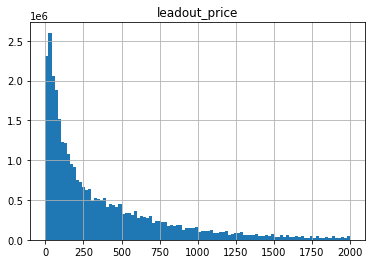

In [8]:
df.hist(column='leadout_price', range=[0,2000],bins=100)


array([[<AxesSubplot:title={'center':'pos'}>]], dtype=object)

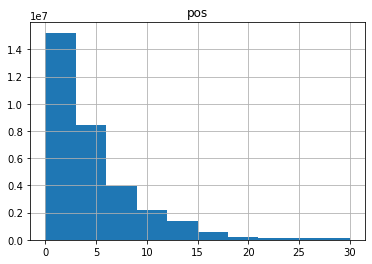

In [9]:
df.hist(column='pos', range=[0,30],bins=10)

array([[<AxesSubplot:title={'center':'hr'}>]], dtype=object)

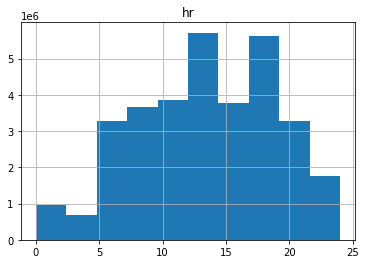

In [10]:
df.hist(column='hr', range=[0,24],bins=10)

array([[<AxesSubplot:title={'center':'year_month'}>]], dtype=object)

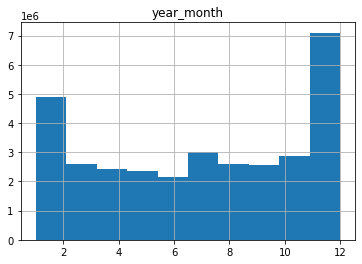

In [11]:
df.hist(column='year_month', range=[1,12],bins=10)

In [12]:
df.groupby(['pos']).count()

,year_month,hr,leadout_price,sub_category_name,leadout_count
pos,,,,,
1,9817315,9817315,9817315,9817315,9817315
2,5404334,5404334,5404334,5404334,5404334
3,3710247,3710247,3710247,3710247,3710247
4,2692945,2692945,2692945,2692945,2692945
5,2064591,2064591,2064591,2064591,2064591
...,...,...,...,...,...
991,1,1,1,1,1
992,1,1,1,1,1
993,1,1,1,1,1


In [13]:
df.isnull().sum(axis = 0)

year_month           0
hr                   0
leadout_price        0
pos                  0
sub_category_name    0
leadout_count        0
dtype: int64

In [84]:
#df = pd.merge(df, a[['avg_leadout_count','avg_position']], on='sub_category_name', how='inner')

In [85]:

#df['final_pos'] = np.NaN
#df['final_pos'] = df['leadout_click_position'].fillna(df['leadout_click_position']).fillna(df['avg_position'])


In [14]:
df.dtypes

year_month             int64
hr                     int64
leadout_price        float64
pos                    int64
sub_category_name     object
leadout_count          int64
dtype: object

In [40]:
values = [7,8,9] 
  
df_1=df[(df['leadout_price']<=250) & (df['pos']<10) & (df['year_month'].isin(values)) & (df['leadout_count']>0) & (df['leadout_count']<5)]

array([[<AxesSubplot:title={'center':'leadout_price'}>]], dtype=object)

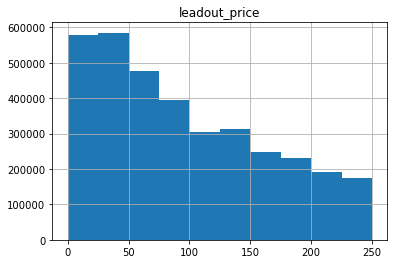

In [41]:
df_1.hist(column='leadout_price', range=[0,250],bins=10)

array([[<AxesSubplot:title={'center':'pos'}>]], dtype=object)

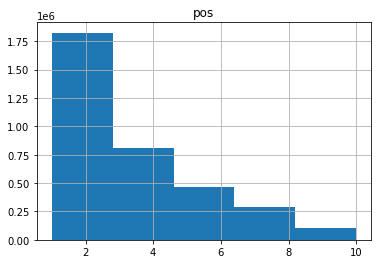

In [42]:
df_1.hist(column='pos', range=[1,10],bins=5)

array([[<AxesSubplot:title={'center':'leadout_count'}>]], dtype=object)

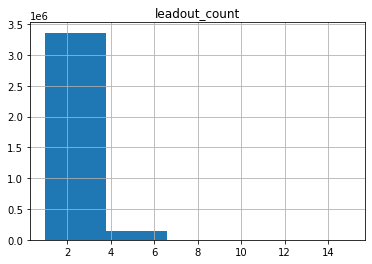

In [43]:
df_1.hist(column='leadout_count', range=[1,15],bins=5)

In [44]:
df_1.shape

(3497931, 6)

In [45]:

df_1.corr()

,year_month,hr,leadout_price,pos,leadout_count
year_month,1.000000,0.003188,-0.018922,-0.001132,0.003539
hr,0.003188,1.000000,-0.000798,0.005590,0.021276
leadout_price,-0.018922,-0.000798,1.000000,0.041420,0.023410
pos,-0.001132,0.005590,0.041420,1.000000,-0.114812
leadout_count,0.003539,0.021276,0.023410,-0.114812,1.000000


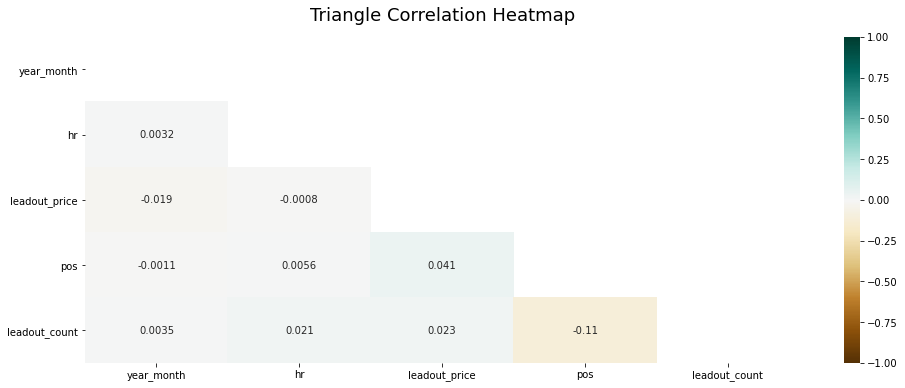

In [46]:
plt.figure(figsize=(16, 6))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(df_1.corr(), dtype=np.bool))
heatmap = sns.heatmap(df_1.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

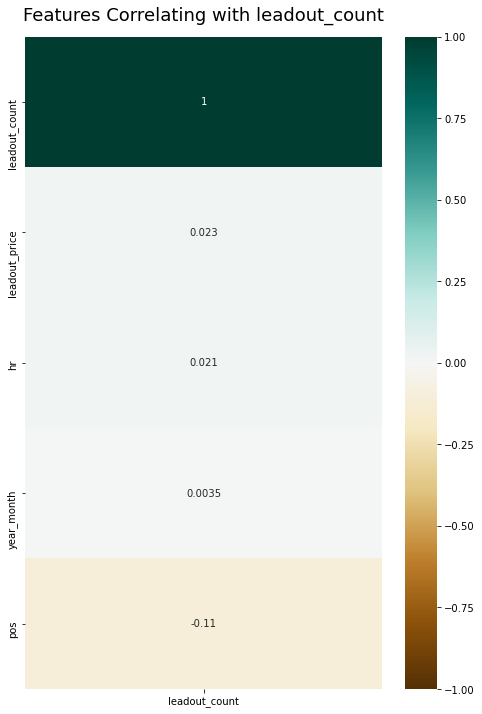

In [47]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df_1.corr()[['leadout_count']].sort_values(by='leadout_count', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with leadout_count', fontdict={'fontsize':18}, pad=16);

In [48]:
features=df_1
features = pd.get_dummies(features)

In [49]:
features

,year_month,hr,leadout_price,pos,leadout_count,sub_category_name_Bartschneider & Haarschneider,sub_category_name_Computer,sub_category_name_Drucker & Scanner,sub_category_name_Elektrische Zahnbürste,sub_category_name_Fotografie,sub_category_name_Gaming- & Elektrospielzeug,sub_category_name_Haushaltselektronik,sub_category_name_HiFi & Audio,sub_category_name_Medien,sub_category_name_TV & Sat,sub_category_name_Telekommunikation
21,9,7,154.99,5,1,0,0,0,0,1,0,0,0,0,0,0
30,9,17,82.86,1,4,0,0,0,0,0,0,1,0,0,0,0
46,9,15,71.91,1,3,0,0,0,0,0,0,1,0,0,0,0
64,9,8,125.72,1,3,0,1,0,0,0,0,0,0,0,0,0
83,9,6,202.37,4,1,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32573036,7,13,204.74,2,1,0,0,0,0,0,0,0,0,0,0,1
32573042,8,9,204.97,8,1,0,0,0,0,0,0,0,0,0,0,1
32573043,9,21,190.85,4,1,0,1,0,0,0,0,0,0,0,0,0
32573047,7,10,220.63,2,1,0,0,0,0,0,0,0,0,0,0,1


In [50]:
# Labels are the values we want to predict
labels = np.array(features['leadout_count'])
# Remove the labels from the features
# axis 1 refers to the columns
features= features.drop('leadout_count', axis = 1)
# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)

In [51]:

# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.20, random_state = 42)


In [52]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (2798344, 15)
Training Labels Shape: (2798344,)
Testing Features Shape: (699587, 15)
Testing Labels Shape: (699587,)


In [29]:
feature_list

['year_month',
 'hr',
 'leadout_price',
 'pos',
 'sub_category_name_Bartschneider & Haarschneider',
 'sub_category_name_Computer',
 'sub_category_name_Drucker & Scanner',
 'sub_category_name_Elektrische Zahnbürste',
 'sub_category_name_Fotografie',
 'sub_category_name_Gaming- & Elektrospielzeug',
 'sub_category_name_Haushaltselektronik',
 'sub_category_name_HiFi & Audio',
 'sub_category_name_Medien',
 'sub_category_name_TV & Sat',
 'sub_category_name_Telekommunikation']

In [53]:
# The baseline predictions are the historical averages
baseline_preds = test_labels.mean()
# Baseline errors, and display average baseline error
baseline_errors = abs(baseline_preds - test_labels)
print('Average baseline error: ', round(np.mean(baseline_errors), 2))

Average baseline error:  0.63


In [54]:
baseline_preds

1.4475697804561833

In [55]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 10)
# Train the model on training data
rf.fit(train_features, train_labels);

In [56]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.58 degrees.


In [57]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 59.77 %.


In [61]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


In [63]:

from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]

# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
graph.write_png('tree.png')

KeyboardInterrupt: 

In [104]:
tree_small

DecisionTreeRegressor(max_depth=3, max_features='auto', random_state=894518072)

In [58]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: leadout_price        Importance: 0.56
Variable: hr                   Importance: 0.27
Variable: year_month           Importance: 0.1
Variable: pos                  Importance: 0.03
Variable: sub_category_name_Computer Importance: 0.01
Variable: sub_category_name_Drucker & Scanner Importance: 0.01
Variable: sub_category_name_Bartschneider & Haarschneider Importance: 0.0
Variable: sub_category_name_Elektrische Zahnbürste Importance: 0.0
Variable: sub_category_name_Fotografie Importance: 0.0
Variable: sub_category_name_Gaming- & Elektrospielzeug Importance: 0.0
Variable: sub_category_name_Haushaltselektronik Importance: 0.0
Variable: sub_category_name_HiFi & Audio Importance: 0.0
Variable: sub_category_name_Medien Importance: 0.0
Variable: sub_category_name_TV & Sat Importance: 0.0
Variable: sub_category_name_Telekommunikation Importance: 0.0


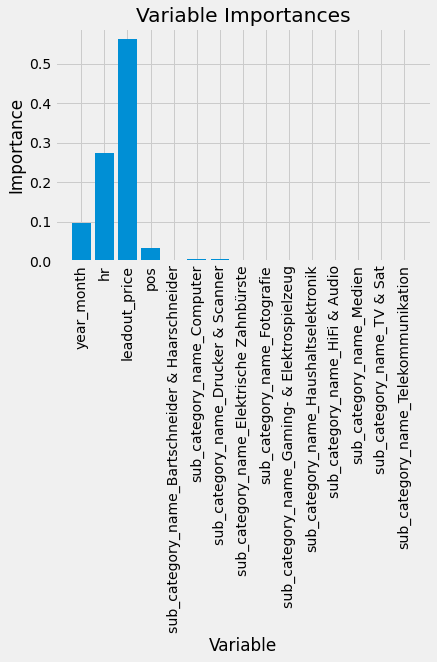

In [64]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');